In [4]:
from itertools import permutations
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
import string
import re

## Read Data

In [5]:
# preprocess lyrics
def clean_lyrics(lyrics):
    if type(lyrics) == str:
        lyrics = re.sub("[\(\[].*?[\)\]]", "", lyrics)
        lyrics = lyrics.translate(str.maketrans('', '', string.punctuation))

        return lyrics
    return None

data = pd.read_csv("top100_songs_features.csv")
data["lyrics"] = data["lyrics"].apply(clean_lyrics)
data.head(3)

,Position,Track Name,Artist,Streams,URL,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,lyrics
0,1,Toosie Slide,Drake,6419643,https://open.spotify.com/track/127QTOFJsJQp5Lb...,0.834,0.454,1,-9.750,0,...,0.837,81.618,audio_features,127QTOFJsJQp5LbJbu3A1y,spotify:track:127QTOFJsJQp5LbJbu3A1y,https://api.spotify.com/v1/tracks/127QTOFJsJQp...,https://api.spotify.com/v1/audio-analysis/127Q...,247059,4,\nBlack leather glove no sequins\nBuckles on t...
1,2,Blinding Lights,The Weeknd,6356173,https://open.spotify.com/track/0VjIjW4GlUZAMYd...,0.514,0.730,1,-5.934,1,...,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,\nYeah\n\n\nIve been tryna call\nIve been on m...
2,3,Roses - Imanbek Remix,SAINt JHN,5102923,https://open.spotify.com/track/24Yi9hE78yPEbZ4...,0.770,0.724,8,-5.484,1,...,0.898,121.974,audio_features,24Yi9hE78yPEbZ4kxyoXAI,spotify:track:24Yi9hE78yPEbZ4kxyoXAI,https://api.spotify.com/v1/tracks/24Yi9hE78yPE...,https://api.spotify.com/v1/audio-analysis/24Yi...,176840,4,\nRoses\nI walked in the corner with the body ...


In [6]:
continuous_features = ["danceability", "energy", "acousticness", "instrumentalness", "liveness", "speechiness", "tempo", "valence"]

selected_tracks = pd.DataFrame()
for feature in continuous_features:
    selected_tracks = selected_tracks.append(data[data[feature].eq(data[feature].max())][:1])
    selected_tracks = selected_tracks.append(data[data[feature].eq(data[feature].min())][:1])

selected_tracks.drop_duplicates(inplace=True)
selected_tracks = selected_tracks.reset_index(drop=True)
selected_tracks.head(3)

,Position,Track Name,Artist,Streams,URL,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,lyrics
0,75,Broke In A Minute,Tory Lanez,1022445,https://open.spotify.com/track/4xqIYGwwZTEem9U...,0.932,0.707,0,-5.469,0,...,0.769,119.988,audio_features,4xqIYGwwZTEem9U8A42SPF,spotify:track:4xqIYGwwZTEem9U8A42SPF,https://api.spotify.com/v1/tracks/4xqIYGwwZTEe...,https://api.spotify.com/v1/audio-analysis/4xqI...,132024,4,\nYeah word to Mazii nigga \nFuck these niggas...
1,58,lovely (with Khalid),Billie Eilish,1257179,https://open.spotify.com/track/0u2P5u6lvoDfwTY...,0.351,0.296,4,-10.109,0,...,0.120,115.284,audio_features,0u2P5u6lvoDfwTYjAADbn4,spotify:track:0u2P5u6lvoDfwTYjAADbn4,https://api.spotify.com/v1/tracks/0u2P5u6lvoDf...,https://api.spotify.com/v1/audio-analysis/0u2P...,200186,4,August 2019 Update\nCharli XCX Warm \nCarolin...
2,25,Boss Bitch,Doja Cat,2113649,https://open.spotify.com/track/78qd8dvwea0Gosb...,0.707,0.955,10,-4.593,0,...,0.575,125.989,audio_features,78qd8dvwea0Gosb6Fe6j3k,spotify:track:78qd8dvwea0Gosb6Fe6j3k,https://api.spotify.com/v1/tracks/78qd8dvwea0G...,https://api.spotify.com/v1/audio-analysis/78qd...,134240,4,\nMmm\nI aint tryna \nI aint tryna\nI aint try...


In [7]:
fix_lyrics = """I had a dream
I got everything I wanted
Not what you'd think
And if I'm being honest
It might've been a nightmare
To anyone who might care
Thought I could fly (fly)
So I stepped off the Golden, mm
Nobody cried (cried, cried, cried, cried)
Nobody even noticed
I saw them standing right there
Kinda thought they might care (might care, might care)
I had a dream
I got everything I wanted
But when I wake up, I see
You with me
And you say, "As long as I'm here
No one can hurt you
Don't wanna lie here
But you can learn to
If I could change
The way that you see yourself
You wouldn't wonder why you hear
They don't deserve you"
I tried to scream
But my head was underwater
They called me weak
Like I'm not just somebody's daughter
Coulda been a nightmare
But it felt like they were right there
And it feels like yesterday was a year ago
But I don't wanna let anybody know
'Cause everybody wants something from me now
And I don't wanna let 'em down
I had a dream
I got everything I wanted
But when I wake up, I see
You with me
And you say, "As long as I'm here
No one can hurt you
Don't wanna lie here
But you can learn to
If I could change
The way that you see yourself
You wouldn't wonder why you hear
They don't deserve you"
If I knew it all then would I do it again?
Would I do it again?
If they knew what they said would go straight to my head
What would they say instead?
If I knew it all then would I do it again?
Would I do it again?
If they knew what they said would go straight to my head
What would they say instead?
"""

selected_tracks.loc[selected_tracks["Track Name"] == "everything i wanted", "lyrics"] = clean_lyrics(fix_lyrics)

In [8]:
fix_lyrics = """Workin' on the weekend like usual
Way off in the deep end like usual
Niggas swear they passed us, they doin' too much
Haven't done my taxes, I'm too turnt up
Virgil got a Patek on my wrist going nuts
Niggas caught me slipping once, okay, so what?
Someone hit your block up, I'd tell you if it was us
Manor house in Rosewood, this shit too plush
Say my days are numbered, but I keep wakin' up
Know you see my texts, baby, please say somethin'
Wine by the glass, your man a cheapskate, huh?
Niggas gotta move off my release day, huh?
Bitch, this is fame, not clout
I don't even know what that's about, watch your mouth
Baby got a ego twice the size of the crib
I can never tell her shit, it is what it is
Said what I had to and did what I did
Never turn my back on FBG, God forbid
Virgil got the Patek on my wrist doing frontflips
Giving you my number, but don't hit me on no dumb shit
Workin' on the weekend like usual
Way off in the deep end like usual (like usual)
Niggas swear they passed us, they doin' too much
Haven't done my taxes, I'm too turnt up
Virgil got a Patek on my wrist going nuts
Niggas caught me slipping once, okay, so what?
Someone hit your block up, I'd tell you if it was us
Manor house in Rosewood, this shit too plush
It's cool, man, got red bottoms on
Life is good, you know what I mean? Like
Uh, hunnid thousand for the cheapest ring
On a nigga finger, lil' bitch, woo
I done flew one out to Spain to be in my domain
And Audemar'd the bitch, woo
Dropped three dollars on a ring
Call it Bentley truck, lil' bitch, woo
I was in the trap serving cocaine
I ain't been the same since, woo
Granny, she was standing right there
While I catch a play on a brick, woo
I make them lil' niggas go haywire
Taliban in this bitch, woo
I done been down bad in them trenches
Had to ride with that stick, woo
Who gave you pills? Who gave you that dust?
Pluto sent you on a lick, woo
Too many convicts
They enrolled me to play in this shit, woo
I'm tryna avoid nonsense
Get Osama sprayed in this bitch, woo
They had the candlelight, lighting it up
Nigga, anybody could get it, woo
I'm on a PJ lighting it up
Backwood full of sticky, woo
I'm tryna tote that Draco in London
And it's an extended, woo
They gotta stretch a nigga out
We gon' die for this shit, woo
Yeah, I ride for my niggas
I lie to my bitch, woo
We some poor, high-class niggas
Made it, we rich, yeah
I was at the bando
Got a penthouse for a closet, woo
It's like a chandelier
On my neck, my wrist, woo
I got pink toes
They talk different languages, woo
Got Promethazine in my blood and Percocet
Yeah, hunnid thousand for the cheapest ring
On a nigga finger, lil' bitch, woo
I done flew one out to Spain to be in my domain
And Audemar'd the bitch, woo
Dropped three dollars on a ring
Call it Bentley truck, lil' bitch, woo
I was in the trap serving cocaine
I ain't been the same since
Racks by the ton I call up Serena
I go tremendo for new fettuccini
All fact though, clarity pinky
All fact though, we order up the Fiji
I'm in the loop with the voo
I'm in the loop with the woo
Which one of you working?
I put your face on the news
I put the pussy on the shirt
After I murk, then make 'em go shoot up the hearse
Cost me a quarter bird
Nigga it's worth it, then you a maniac
A fucking alien, how you splurgin'?
Got that kitty cat, I'm having fun with that
Goin' Birkin
Yeah, hunnid thousand for the cheapest ring
On a nigga finger, lil' bitch, woo
I done flew one out to Spain to be in my domain
And Audemar'd the bitch, woo
Dropped three dollars on a ring
Call it Bentley truck, lil' bitch, woo
I was in the trap serving cocaine
I ain't been the same since
"""

selected_tracks.loc[selected_tracks["Track Name"] == "Life Is Good (feat. Drake)", "lyrics"] = clean_lyrics(fix_lyrics)

In [9]:
fix_lyrics = """Thought I found a way
Thought I found a way, yeah (found)
But you never go away (never go away)
So I guess I gotta stay now
Oh, I hope some day I'll make it out of here
Even if it takes all night or a hundred years
Need a place to hide, but I can't find one near
Wanna feel alive, outside I can fight my fear
Isn't it lovely, all alone?
Heart made of glass, my mind of stone
Tear me to pieces, skin to bone
Hello, welcome home
Walkin' out of town
Lookin' for a better place (lookin' for a better place)
Something's on my mind
Always in my headspace
But I know some day I'll make it out of here
Even if it takes all night or a hundred years
Need a place to hide, but I can't find one near
Wanna feel alive, outside I can fight my fear
Isn't it lovely, all alone?
Heart made of glass, my mind of stone
Tear me to pieces, skin and bone
Hello, welcome home
Woah, yeah
Yeah, ah
Woah, woah
Hello, welcome home
"""

selected_tracks.loc[selected_tracks["Track Name"] == "lovely (with Khalid)", "lyrics"] = clean_lyrics(fix_lyrics)

In [10]:
selected_tracks["Track Name"].unique()

array(['Broke In A Minute', 'lovely (with Khalid)', 'Boss Bitch',
       "when the party's over", 'Blinding Lights', 'everything i wanted',
       "Don't Start Now", 'The Box', 'Tusa', 'Life Is Good (feat. Drake)',
       '10,000 Hours (with Justin Bieber)', 'Tattoo', 'No Time To Die',
       'Amarillo'], dtype=object)

In [8]:
selected_tracks.to_csv("selected_tracks.csv", index=False)

## Create Lyrics Viz

In [11]:
def create_lyrics_viz(lyrics, track_name, figsize=(15, 15), save_file=False):
    lyrics_split = lyrics.lower().split()
    max_val = len(lyrics_split)
    matrix = np.ones((max_val, max_val))
    
    # color off diagonal
    all_indices = []
    max_count = 0
    for word in np.unique(lyrics_split):
        # get all permutation
        indices = list(permutations(np.where(np.array(lyrics_split) == word)[0], 2))
        all_indices.append(indices)
        if len(indices) > max_count: max_count = len(indices)
    
    for indices in all_indices:
        value = 1 - (len(indices) / max_count)
        for (i, j) in indices:
            matrix[i, j] = value
    
    # color diagonal
    for i in range(max_val):
        matrix[i, i] = 0.8
    
    fig, axes = plt.subplots(figsize=figsize)
    axes.set_title(track_name)
    
    # For adding grid line
#     plt.grid(which='major', axis='both', linestyle='-', color='grey', linewidth=1)
#     plt.xticks(np.arange(-.5, max_val, 1));
#     plt.yticks(np.arange(-.5, max_val, 1));
    
    axes.axis('off')
    axes.imshow(matrix, cmap=plt.cm.YlGnBu)
    if save_file:
        fig.savefig("lyrics-viz/whole-song/{}.png".format(track_name), bbox_inches = 'tight', pad_inches = 0)

In [5]:
# Generate grid line and example
#create_lyrics_viz("You, you make me, make me, make me wanna cry", figsize=(8, 8))

## Color Frequent Words

In [23]:
def color_frequent_words(lyrics, track_name, top_k=1, figsize=(8, 8), save_file=True):
    lyrics_split = lyrics.lower().split()
    max_val = len(lyrics_split)
    
    unique_words = np.unique(lyrics_split)
    num_repeat = []
    all_indices = []
    for word in unique_words:
        indices = list(permutations(np.where(np.array(lyrics_split) == word)[0], 2))
        num_repeat.append(len(indices))
        all_indices.append(indices)
    
    # show the most frequent k words
    for idx in np.argsort(-np.array(num_repeat))[:top_k]:
        matrix = np.ones((max_val, max_val))
        word = unique_words[idx]
        indices = all_indices[idx]
        
        # color words
        for (i, j) in indices:
            matrix[i, j] = 1 - min(0.2 + len(indices) / 200, 1) 
        
        # color diagonal
        for i in range(max_val):
            matrix[i, i] = 0.8
    
        fig, axes = plt.subplots(figsize=figsize)
        axes.set_title('Where "{}" co-occur in the lyrics'.format(word))
        axes.axis('off')
        axes.imshow(matrix, cmap=plt.cm.YlGnBu)
        if save_file:
            fig.savefig("lyrics-viz/top-word/{}.png".format(track_name), bbox_inches = 'tight', pad_inches = 0)

## Color Frequent Sentences

In [21]:
def color_frequent_sentences(lyrics, track_name, top_k=1, figsize=(8, 8), save_file=True):
    lyrics_split = lyrics.lower().split("\n")  # split by sentences
    lyrics_split = [sen for sen in lyrics_split if sen != ""]  # remove blank
    num_words_in_sentence = [len(sen.split()) for sen in lyrics_split]
    cum_sum = np.cumsum(num_words_in_sentence)  # cumulative sum
    max_val = cum_sum[-1]

    unique_sentences = np.unique(lyrics_split)
    num_repeat = []
    all_sentence_indices = []
    for unique_sen in unique_sentences:
        sentence_indices= [idx for idx, sentence in enumerate(lyrics_split) if sentence == unique_sen]
        num_repeat.append(len(sentence_indices))
        all_sentence_indices.append(sentence_indices)
    
    # color words in most frequent sentences
    for idx in np.argsort(-np.array(num_repeat))[:top_k]:
        matrix = np.ones((max_val, max_val))
        sentence = unique_sentences[idx]
        sentence_indices = all_sentence_indices[idx]
        len_sentence = len(sentence.split())

        # get word indicices
        word_indices = []  #(num of repeated sentences, num of words in the sentence)
        for sentence_idx in sentence_indices:
            if sentence_idx == 0:
                word_indices.append(np.arange(0, cum_sum[sentence_idx]))
            else:
                word_indices.append(np.arange(cum_sum[sentence_idx-1], cum_sum[sentence_idx]))
        word_indices = np.array(word_indices)
        #print("{}: {}, {}".format(track_name, word_indices.shape[0], sentence))
        
        # color diagonal
        for i in range(max_val):
            matrix[i, i] = 0.8
            
        # color words in the sentence
        for n in range(len_sentence):
            indices = list(permutations(word_indices[:, n], 2))
            for (i, j) in indices:
                matrix[i, j] = 0.1
            for i in word_indices[:, n]:
                matrix[i, i] = 0.1

        fig, axes = plt.subplots(figsize=figsize)
        axes.set_title('Where "{}" co-occur in the lyrics'.format(sentence))
        axes.axis('off')
        axes.imshow(matrix, cmap=plt.cm.YlGnBu)
        if save_file:
            fig.savefig("lyrics-viz/top-sentence/{}.png".format(track_name), bbox_inches = 'tight', pad_inches = 0)

## Get Statistics

In [9]:
def get_statistics(lyrics):
    lyrics_split = lyrics.lower().split()
    max_val = len(lyrics_split)
    
    unique_words = np.unique(lyrics_split)
    counts = []
    for word in unique_words:
        counts.append(len(np.where(np.array(lyrics_split) == word)[0]))
    
    max_count = max(counts)
    ratio = [c / max_count for c in counts]
    
    return unique_words, counts, ratio

In [10]:
for row in selected_tracks[:10].iterrows():
    song = row[1]
    unique_words, counts, ratio = get_statistics(song["lyrics"])
    df = pd.DataFrame({"word": unique_words, "counts": counts, "ratio": ratio})
    df.to_csv("lyrics-statistics/{}-lyrics-statistics.csv".format(song["Track Name"]), index=False)

## Generate images for all tracks

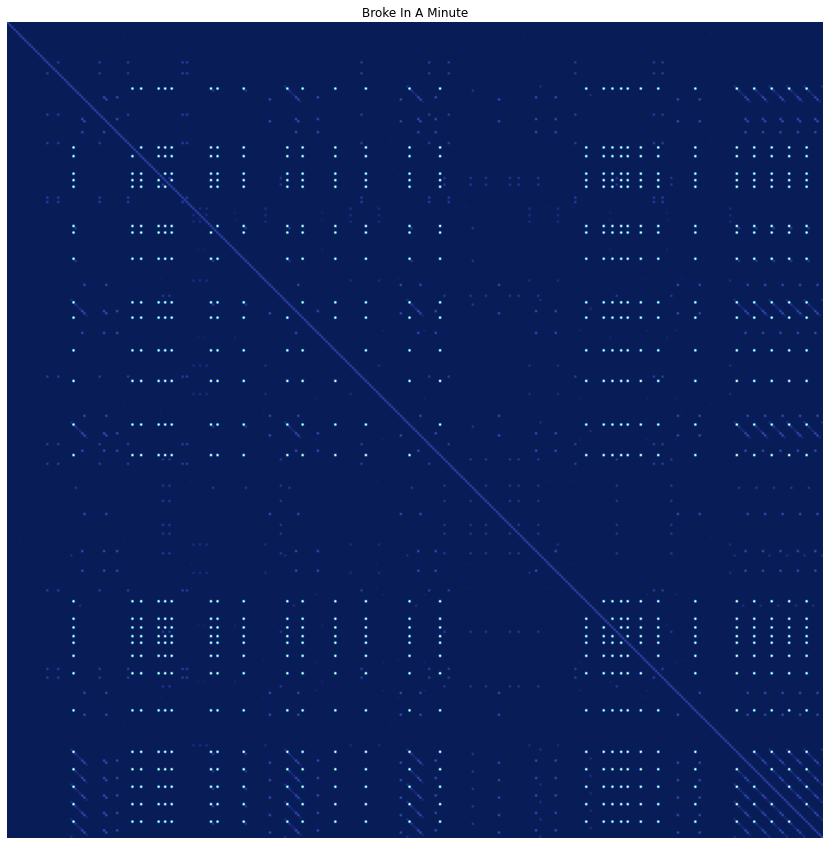

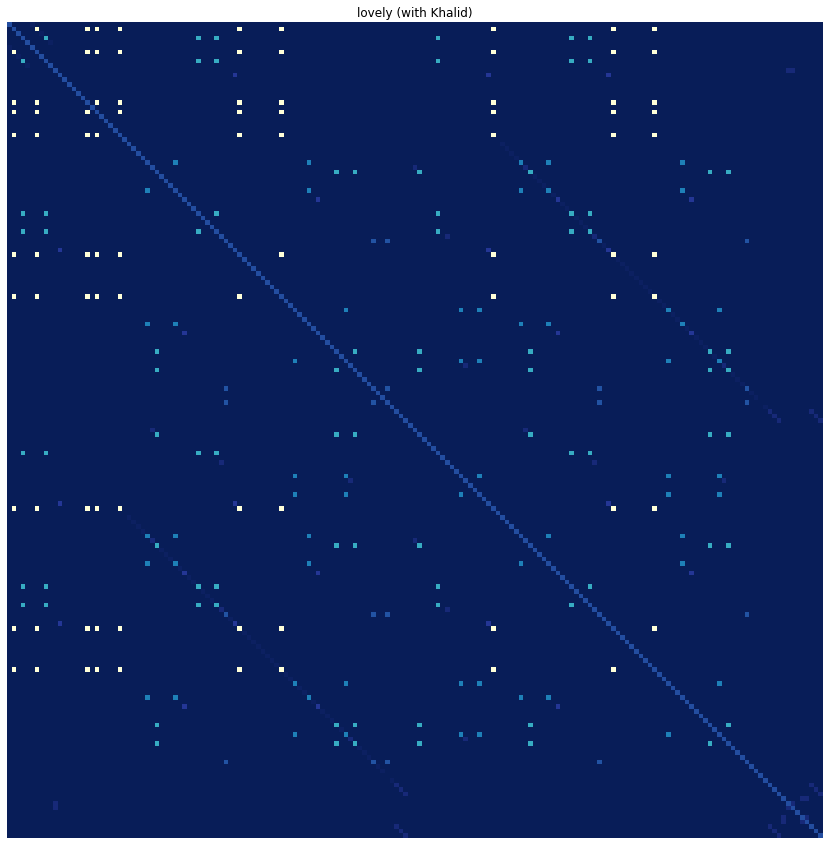

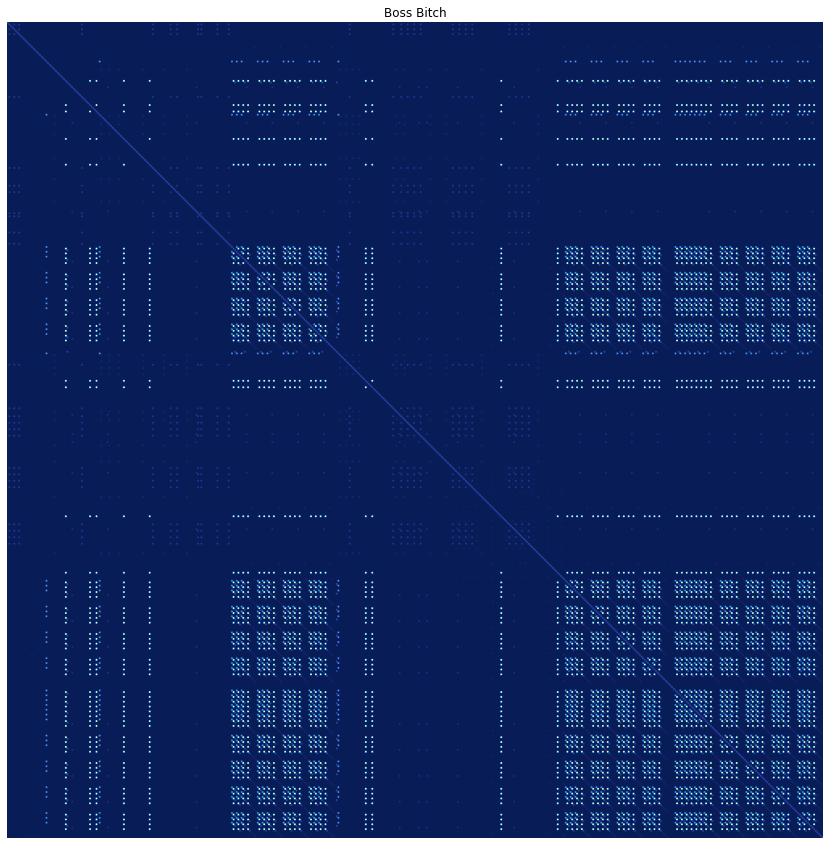

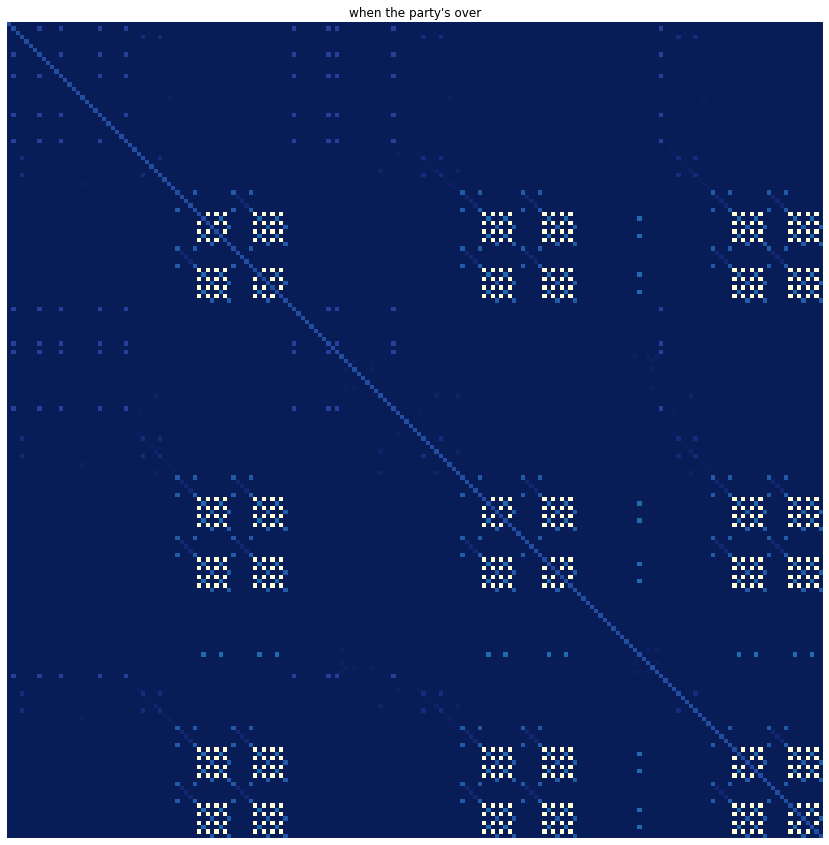

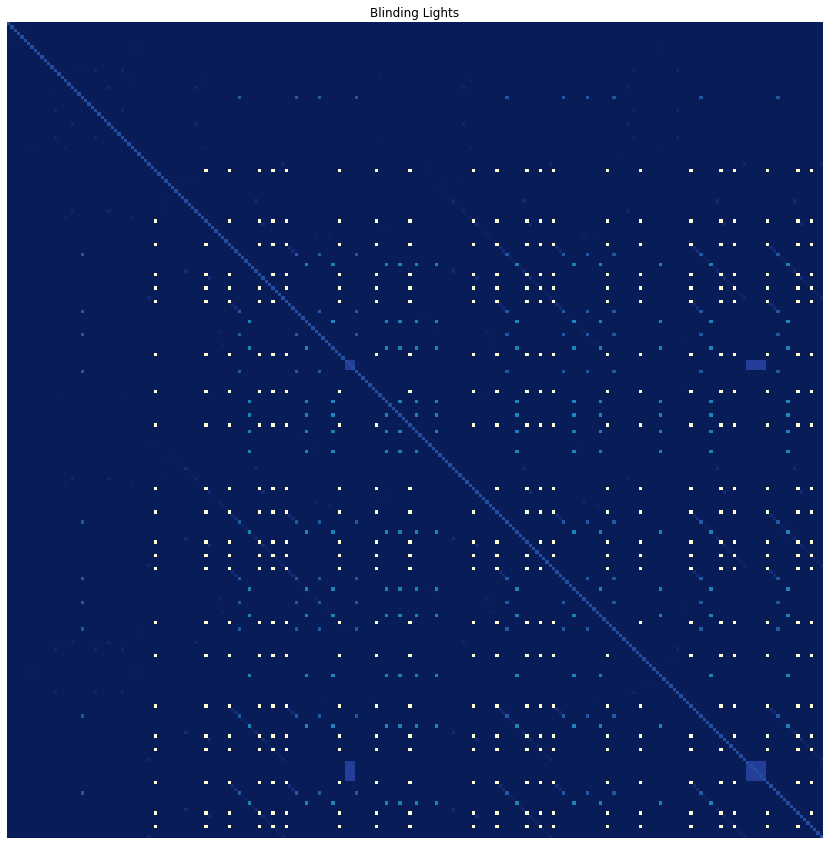

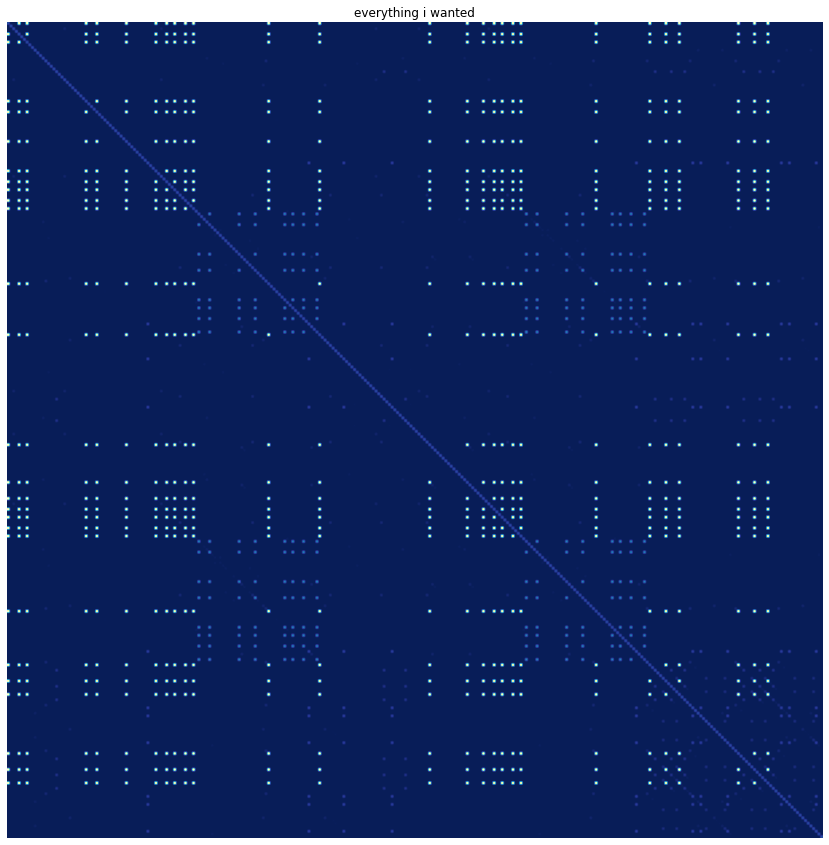

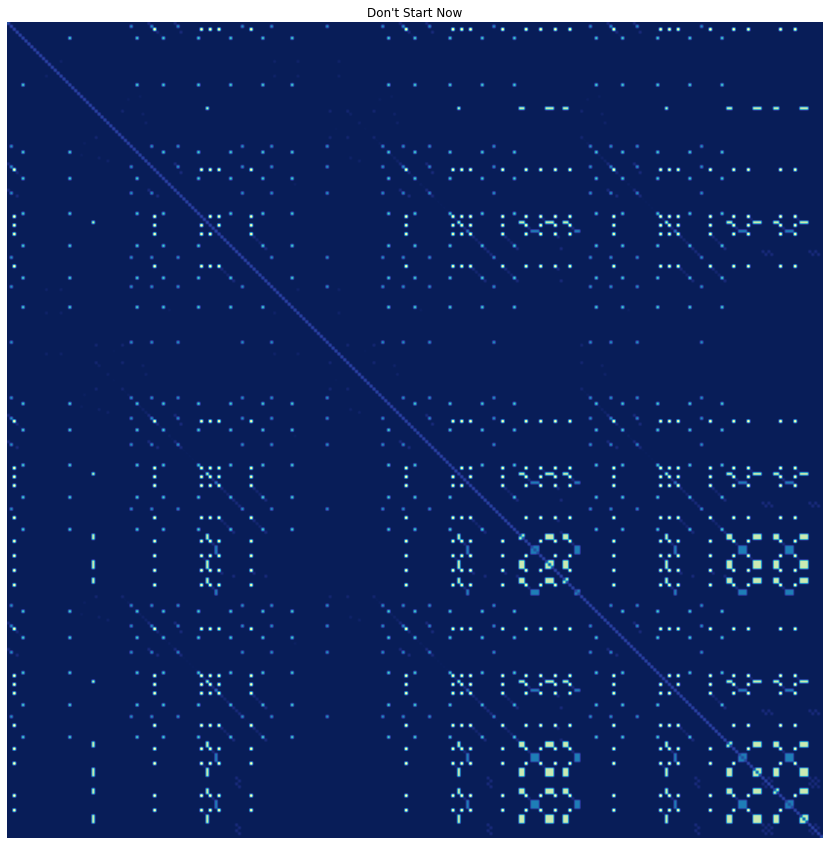

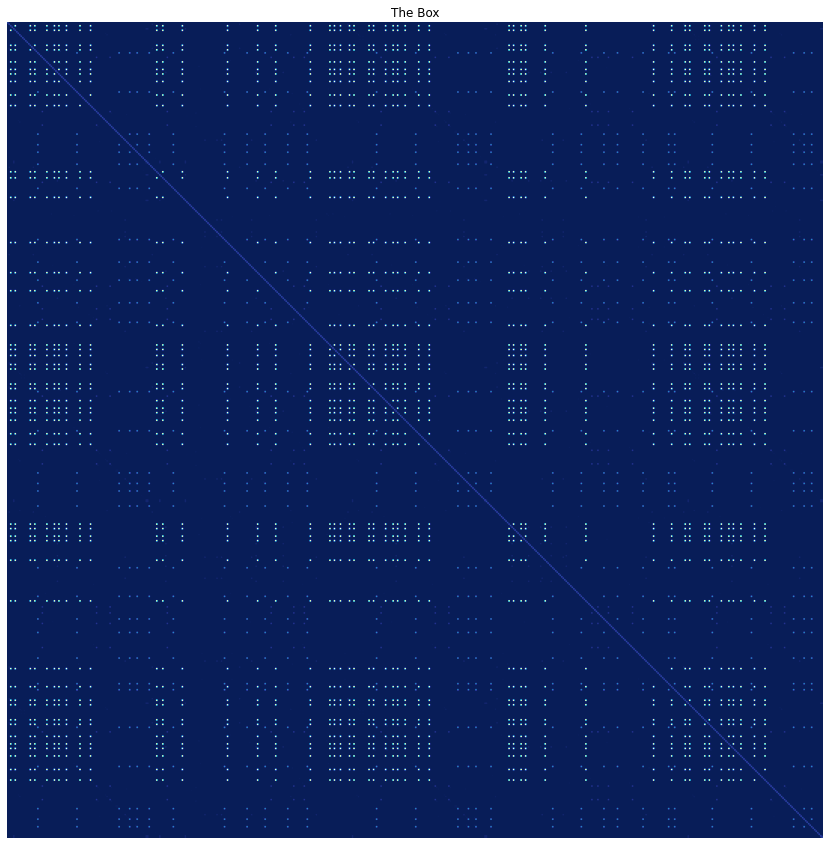

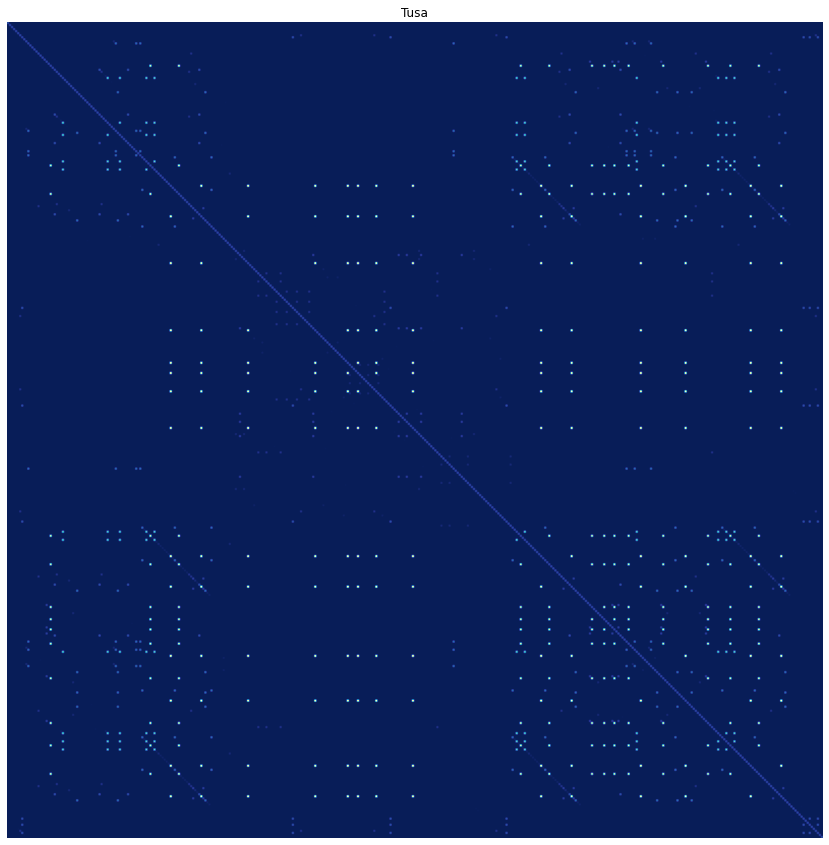

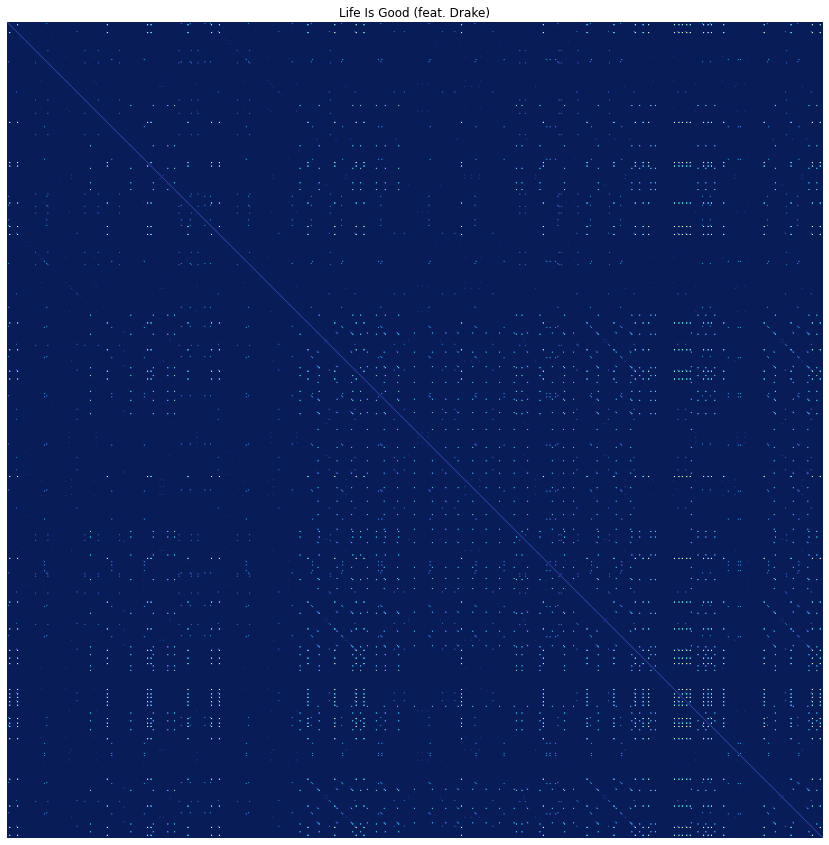

In [12]:
for row in selected_tracks[:10].iterrows():
    song = row[1]
    create_lyrics_viz(song["lyrics"], song["Track Name"], save_file=True)

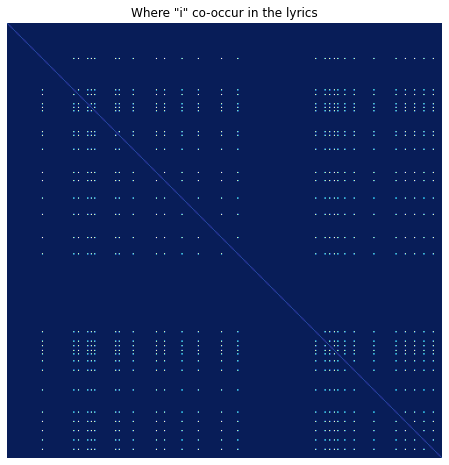

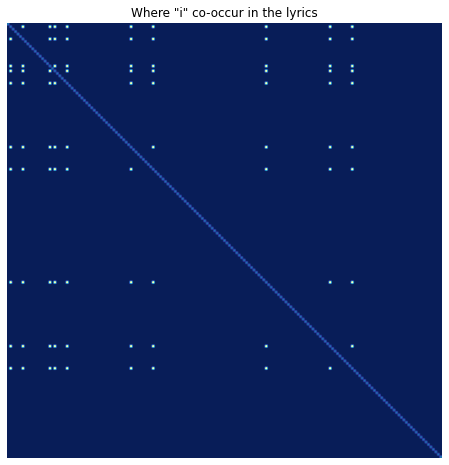

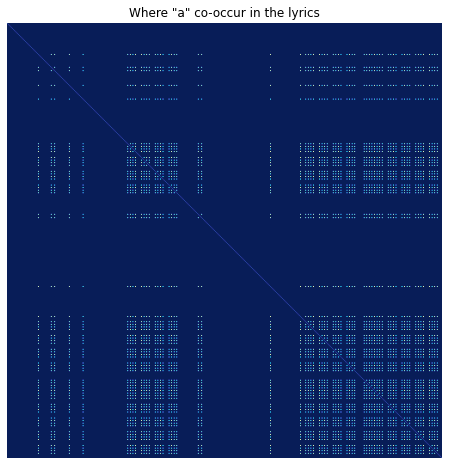

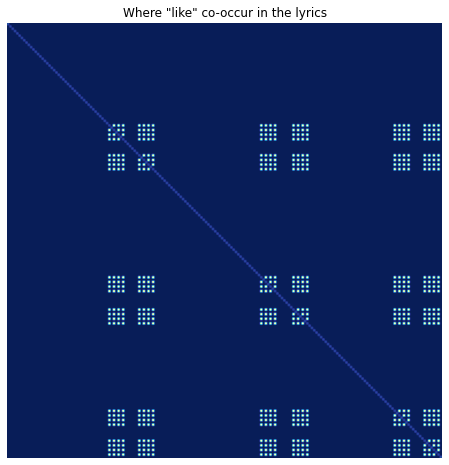

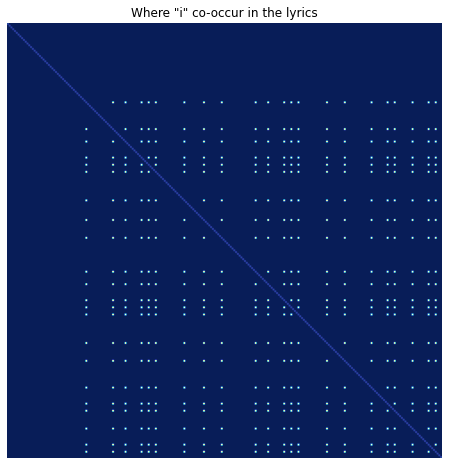

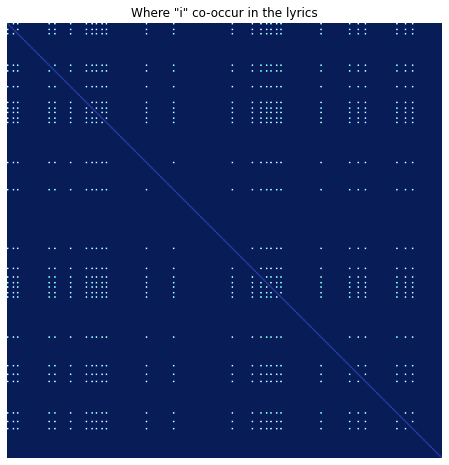

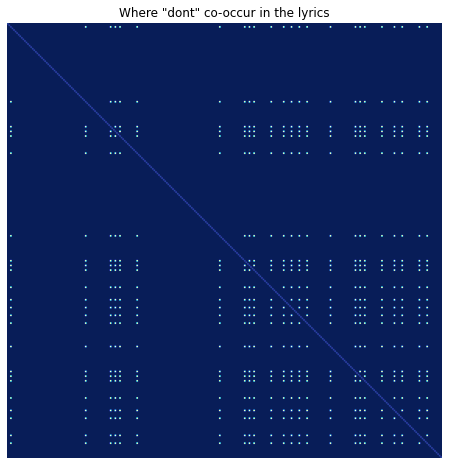

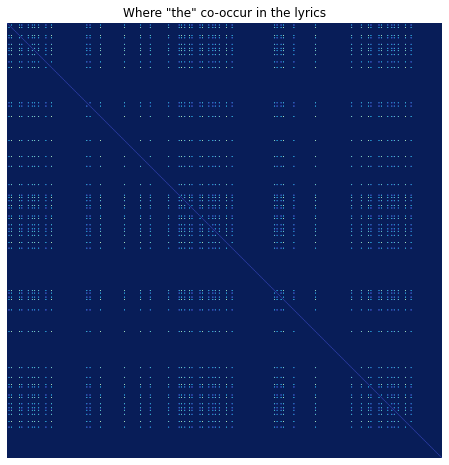

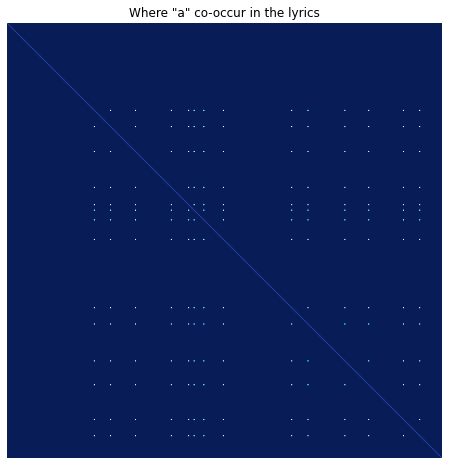

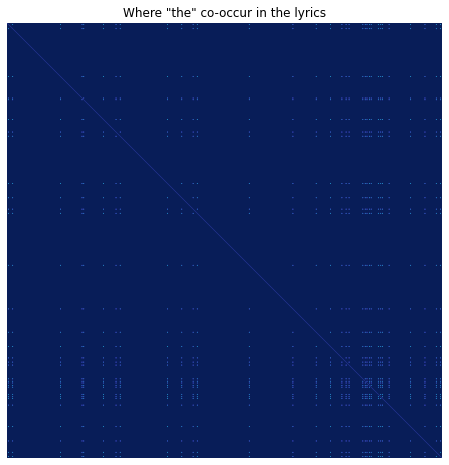

In [24]:
for row in selected_tracks[:10].iterrows():
    song = row[1]
    color_frequent_words(song["lyrics"], song["Track Name"], save_file=True)

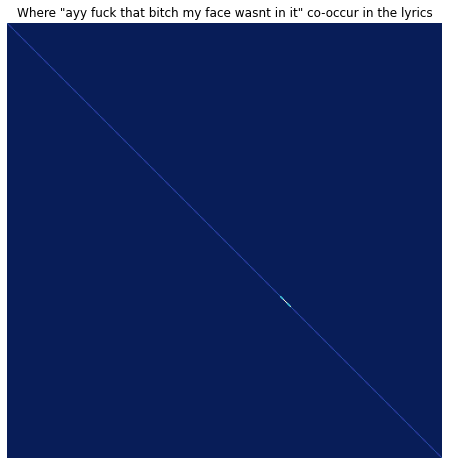

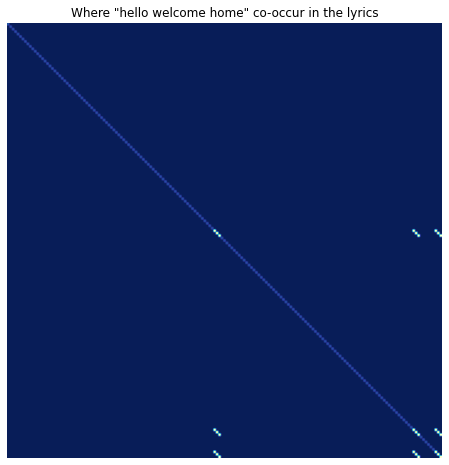

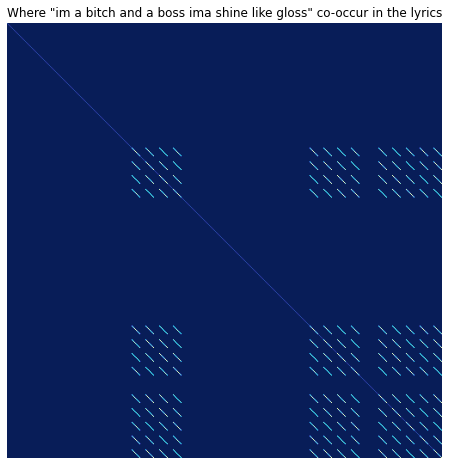

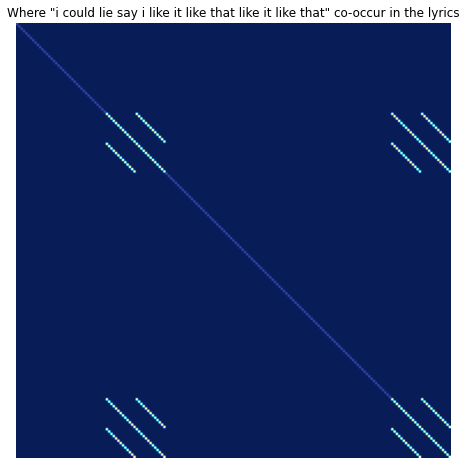

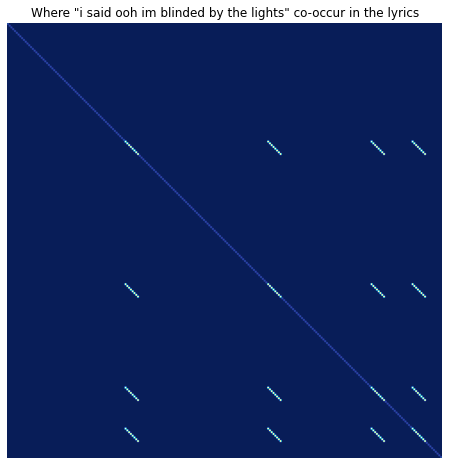

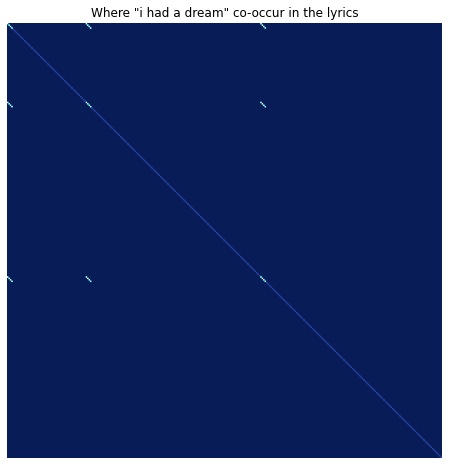

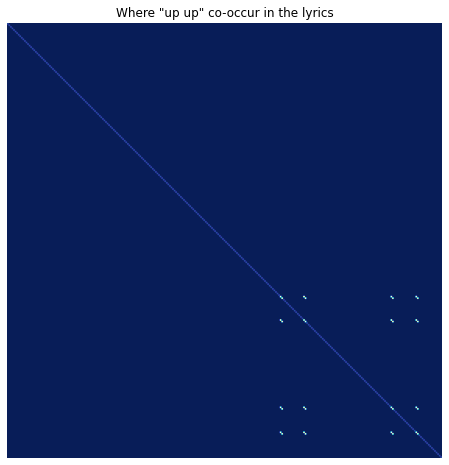

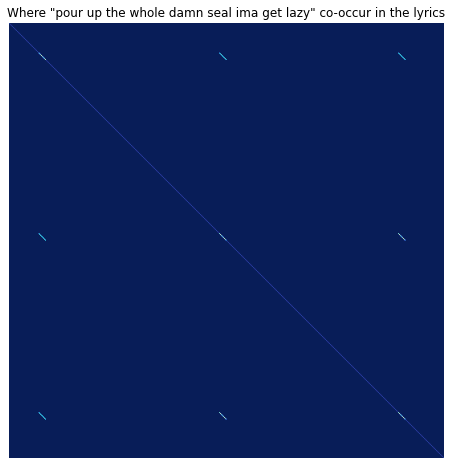

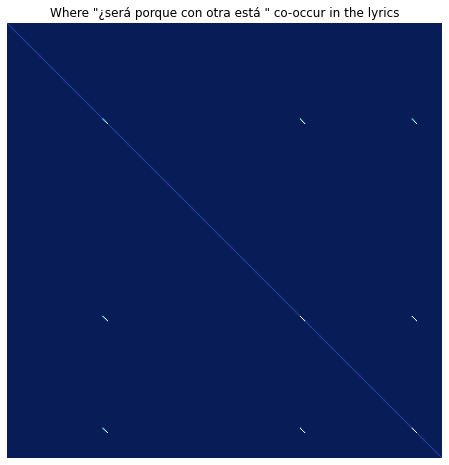

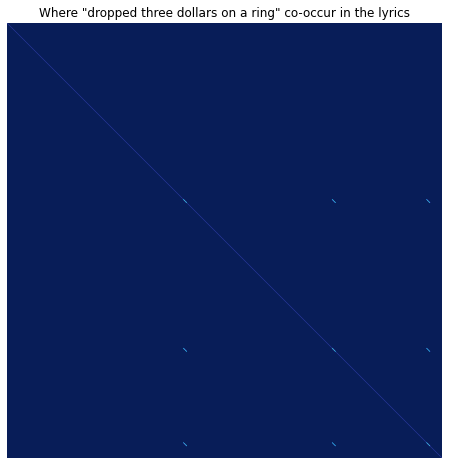

In [22]:
for row in selected_tracks[:10].iterrows():
    song = row[1]
    color_frequent_sentences(song["lyrics"], song["Track Name"], save_file=True)